## Importing necessary libraries and modules for this notebook<a name ="h3"></a>

In [3]:
!pip install tensorflow

In [4]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

## Exploratory Analysis<a name ="h4"></a>

In [5]:
import os 
DIR = '/Users/SRAVYA/Downloads/archive (1)'

#Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes


['Black Sea Sprat',
 'Clams',
 'Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Fish',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Otter',
 'Penguin',
 'Puffers',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Shrimp',
 'Squid',
 'Starfish',
 'Striped Red Mullet',
 'Trout',
 'Turtle_Tortoise',
 'Whale']

In [8]:
import os
import pandas as pd

DIR = '/Users/SRAVYA/Downloads/archive (1)'
label = []
path = []

for dirname, _, filenames in os.walk(DIR):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg')) and 'GT' not in dirname:
            label.append(os.path.split(dirname)[-1])
            path.append(os.path.join(dirname, filename))

# Create the dataframe
df = pd.DataFrame({'path': path, 'label': label})
df['path']=path
df['label']=label


In [9]:
df.head()

,path,label
0,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
1,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
2,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
3,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat
4,/Users/SRAVYA/Downloads/archive (1)\Black Sea ...,Black Sea Sprat


In [10]:
df.path[0]

'/Users/SRAVYA/Downloads/archive (1)\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21711 entries, 0 to 21710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    21711 non-null  object
 1   label   21711 non-null  object
dtypes: object(2)
memory usage: 339.4+ KB


In [12]:
#Checking the value counts of each of the datasets
#df['label']=df['label'].astype('category')
df['label'].value_counts()

Turtle_Tortoise       1903
Black Sea Sprat       1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Sea Bass              1000
Red Sea Bream         1000
Jelly Fish             845
Dolphin                782
Sharks                 590
Sea Urchins            579
Whale                  572
Octopus                562
Puffers                531
Sea Rays               517
Otter                  500
Nudibranchs            500
Corals                 500
Crabs                  499
Lobster                499
Starfish               499
Clams                  497
Eel                    497
Fish                   494
Shrimp                 488
Squid                  483
Penguin                482
Seahorse               478
Seal                   414
Name: label, dtype: int64

In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


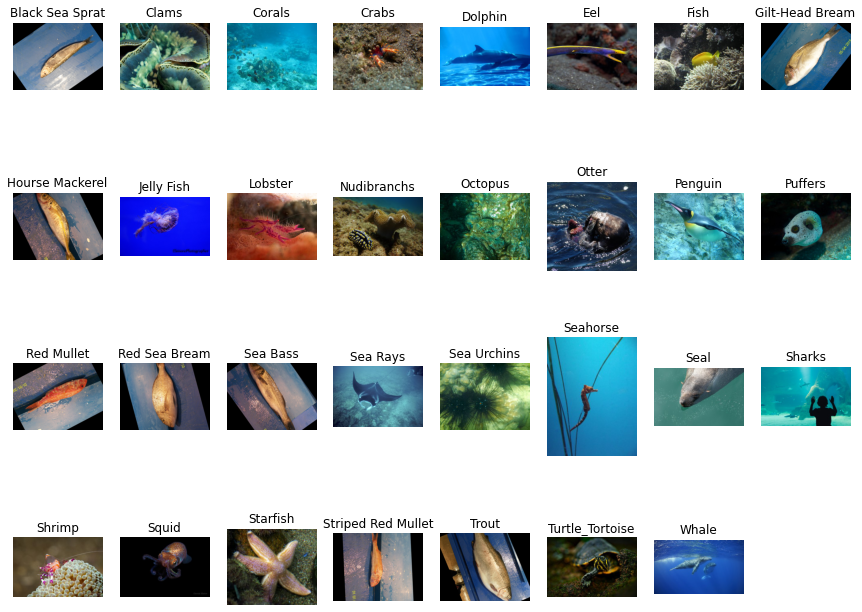

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

dx = 0
plt.figure(figsize=(15, 12))
for idx, unique_label in enumerate(df['label'].unique()):
    image_path = df[df['label'] == unique_label].iloc[0, 0]
    file_extension = os.path.splitext(image_path)[-1].lower()

    if file_extension in ('.png', '.jpg', '.jpeg'):
        try:
            img = Image.open(image_path)
            plt.subplot(4, 8, idx + 1)
            plt.imshow(img)
            plt.title(unique_label)
            plt.axis('off')
        except Exception as e:
            print(f"Error reading image: {e}")
    else:
        print(f"Skipping unsupported image format: {image_path}")


In [15]:
from sklearn.model_selection import train_test_split

#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [16]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(17368, 2)
(4343, 2)


## Image Generation and Preprocessing<a name ="h5"></a>

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 13895 validated image filenames belonging to 31 classes.
Found 3473 validated image filenames belonging to 31 classes.
Found 4343 validated image filenames belonging to 31 classes.


In [19]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

{'Black Sea Sprat': 0,
 'Clams': 1,
 'Corals': 2,
 'Crabs': 3,
 'Dolphin': 4,
 'Eel': 5,
 'Fish': 6,
 'Gilt-Head Bream': 7,
 'Hourse Mackerel': 8,
 'Jelly Fish': 9,
 'Lobster': 10,
 'Nudibranchs': 11,
 'Octopus': 12,
 'Otter': 13,
 'Penguin': 14,
 'Puffers': 15,
 'Red Mullet': 16,
 'Red Sea Bream': 17,
 'Sea Bass': 18,
 'Sea Rays': 19,
 'Sea Urchins': 20,
 'Seahorse': 21,
 'Seal': 22,
 'Sharks': 23,
 'Shrimp': 24,
 'Squid': 25,
 'Starfish': 26,
 'Striped Red Mullet': 27,
 'Trout': 28,
 'Turtle_Tortoise': 29,
 'Whale': 30}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

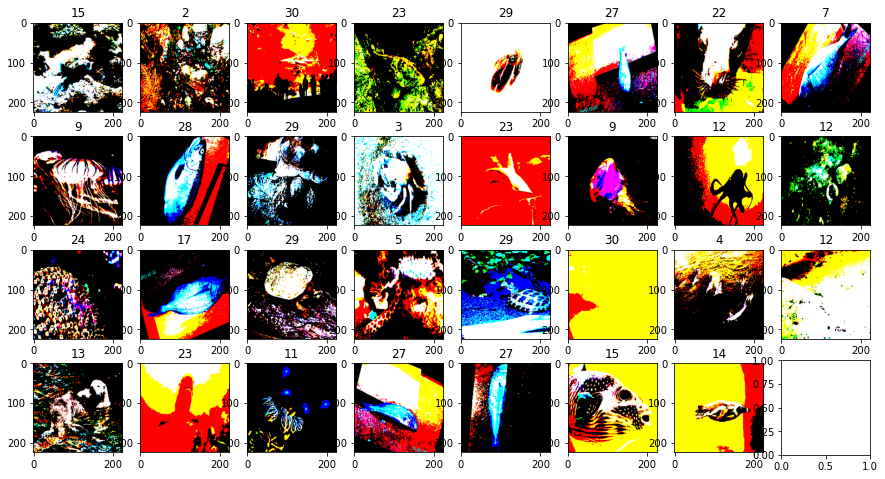

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(15, 8))
ax = ax.flatten()

# Display six images with labels
for i in range(31):
    img, label =  test_images.next() # Get the next image and label from the generator
    ax[i].imshow(img[0])
    label_index = np.argmax(label)
    ax[i].set_title(label_index)  # Assuming labels are one-hot encoded

plt.show()



## Model Training and Evaluation<a name ="h6"></a>

In [23]:
from keras.applications.resnet import ResNet50
pretrained_model = ResNet50(
    weights='imagenet', # Load weights pre-trained on ImageNet.
     include_top=False, # Do not include the ImageNet classifier at the top.
     input_shape=(244,244,3),
 pooling='avg')
pretrained_model.trainable = False

In [25]:
#Creating our model inputs
from tensorflow.keras.callbacks import EarlyStopping
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(31, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=7,
    
)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 250, 250, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 122, 122, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 122, 122, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

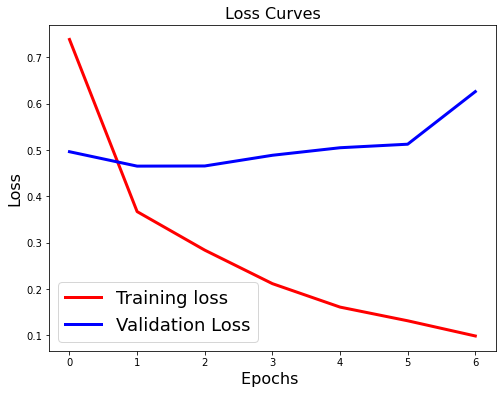

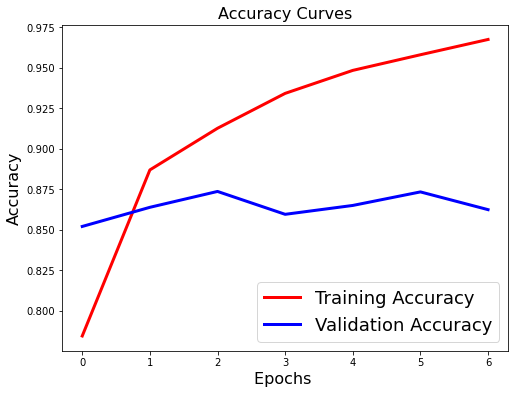

In [33]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [34]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.66785
Test Accuracy: 84.66%


In [35]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

136/136 [==============================] - 476s 3s/step


In [36]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [37]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(20)


,path,label,pred
0,/Users/SRAVYA/Downloads/archive (1)\Trout\Trou...,Trout,Trout
1,/Users/SRAVYA/Downloads/archive (1)\Clams\8529...,Clams,Clams
2,/Users/SRAVYA/Downloads/archive (1)\Lobster\73...,Lobster,Shrimp
3,/Users/SRAVYA/Downloads/archive (1)\Lobster\87...,Lobster,Lobster
4,/Users/SRAVYA/Downloads/archive (1)\Nudibranch...,Nudibranchs,Nudibranchs
5,/Users/SRAVYA/Downloads/archive (1)\Whale\5653...,Whale,Seal
6,/Users/SRAVYA/Downloads/archive (1)\Starfish\6...,Starfish,Starfish
7,/Users/SRAVYA/Downloads/archive (1)\Penguin\15...,Penguin,Penguin
8,/Users/SRAVYA/Downloads/archive (1)\Jelly Fish...,Jelly Fish,Jelly Fish
9,/Users/SRAVYA/Downloads/archive (1)\Gilt-Head ...,Gilt-Head Bream,Gilt-Head Bream


In [38]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]



,path,label,pred
2,/Users/SRAVYA/Downloads/archive (1)\Lobster\73...,Lobster,Shrimp
5,/Users/SRAVYA/Downloads/archive (1)\Whale\5653...,Whale,Seal
15,/Users/SRAVYA/Downloads/archive (1)\Shrimp\678...,Shrimp,Squid
19,/Users/SRAVYA/Downloads/archive (1)\Turtle_Tor...,Turtle_Tortoise,Clams
25,/Users/SRAVYA/Downloads/archive (1)\Fish\60119...,Fish,Penguin
...,...,...,...
4300,/Users/SRAVYA/Downloads/archive (1)\Penguin\36...,Penguin,Sharks
4308,/Users/SRAVYA/Downloads/archive (1)\Fish\84899...,Fish,Turtle_Tortoise
4334,/Users/SRAVYA/Downloads/archive (1)\Lobster\34...,Lobster,Shrimp
4335,/Users/SRAVYA/Downloads/archive (1)\Dolphin\Do...,Dolphin,Turtle_Tortoise


In [39]:
pred_df.path[1604]

'/Users/SRAVYA/Downloads/archive (1)\\Trout\\Trout\\00451.png'

In [42]:
# correct prediction
pred_df[pred_df['label']==pred_df['pred']]

,path,label,pred
0,/Users/SRAVYA/Downloads/archive (1)\Trout\Trou...,Trout,Trout
1,/Users/SRAVYA/Downloads/archive (1)\Clams\8529...,Clams,Clams
3,/Users/SRAVYA/Downloads/archive (1)\Lobster\87...,Lobster,Lobster
4,/Users/SRAVYA/Downloads/archive (1)\Nudibranch...,Nudibranchs,Nudibranchs
6,/Users/SRAVYA/Downloads/archive (1)\Starfish\6...,Starfish,Starfish
...,...,...,...
4337,/Users/SRAVYA/Downloads/archive (1)\Penguin\87...,Penguin,Penguin
4339,/Users/SRAVYA/Downloads/archive (1)\Red Sea Br...,Red Sea Bream,Red Sea Bream
4340,/Users/SRAVYA/Downloads/archive (1)\Sea Bass\S...,Sea Bass,Sea Bass
4341,/Users/SRAVYA/Downloads/archive (1)\Gilt-Head ...,Gilt-Head Bream,Gilt-Head Bream


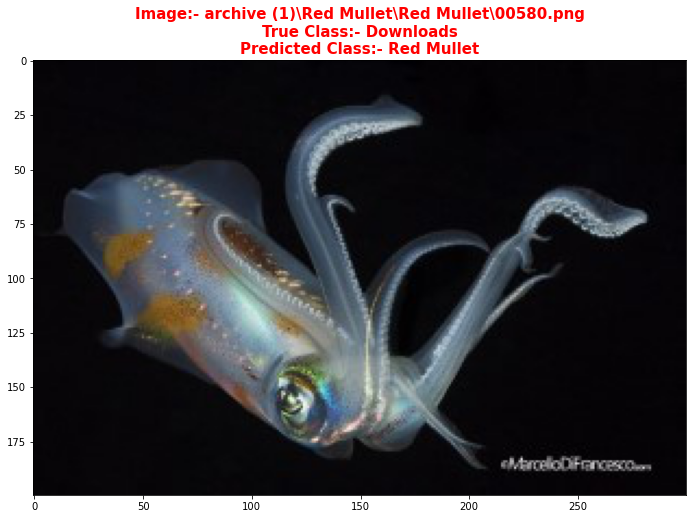

In [53]:
# Which image was it?

plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[65]))
title1 = pred_df.path[3222].split('/')[-2]
title2 = pred_df.path[3222].split('/')[-1]
title3 = pred_df.pred[3222]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.8466497812571955


<AxesSubplot:>

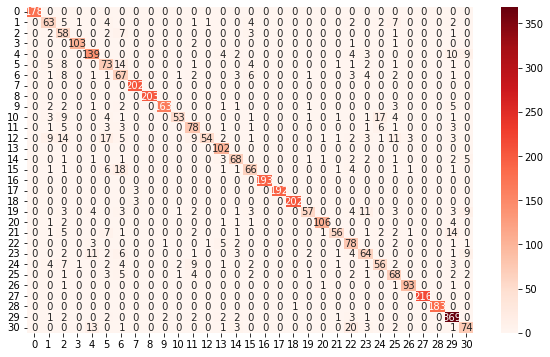

In [51]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d',cmap ='Reds')


In [52]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       178
             Clams       0.67      0.68      0.68        92
            Corals       0.43      0.78      0.56        74
             Crabs       0.98      0.96      0.97       107
           Dolphin       0.80      0.81      0.81       171
               Eel       0.58      0.66      0.62       111
              Fish       0.49      0.66      0.56       101
   Gilt-Head Bream       0.97      1.00      0.99       202
   Hourse Mackerel       1.00      1.00      1.00       203
        Jelly Fish       0.98      0.90      0.94       181
           Lobster       0.91      0.55      0.69        96
       Nudibranchs       0.69      0.76      0.72       103
           Octopus       0.96      0.40      0.56       136
             Otter       0.82      1.00      0.90       102
           Penguin       0.77      0.77      0.77        88
           Puffers       0.70      0.65